<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Recap Bayes Rule

---

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import scipy.stats as stats

sns.set_style('whitegrid')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## Bayes' rule

To review, Bayes' Theorem states:

$$ 
P(model\;|\;data) = \frac{P(data\;|\;model)}{P(data)}\;P(model) 
$$

where 

- $P(model\;|\;data)$ is the **posterior distribution of the model**

- $P(data\;|\;model)$ is the **likelihood of the data given the model**

- $P(data)$ is the **total probability of the data** (the probability of the data occurring across all models)

- and $P(model)$ is the **prior distribution of the model**

## A discrete example

Imagine a stock's price will rise on any given day either with probability $\theta=0.4$ or $\theta=0.6$ with equal probability:

$P(\theta=0.4)=0.5$ and $P(\theta=0.6)=0.5$

Now we observe a price rise on five consecutive days. That has probability $\theta^5$. Let's call this five-day price rise event A.

#### Given event A, which of the two values for $\theta$ is more likely?

#### How much more likely is it?

$$
\begin{eqnarray*}
P(\theta=0.6|A) 
&=& 
\frac{P(A|\theta=0.6)P(\theta=0.6)}
{P(A|\theta=0.6)P(\theta=0.6)+P(A|\theta=0.4)P(\theta=0.4)}\\
&=&
\frac{0.6^5\cdot 0.5}{0.6^5\cdot 0.5+0.4^5\cdot 0.5}\\
&=&
0.8836
\end{eqnarray*}
$$

### Write a function to calculate the above. The function should allow to change the parameters for the probability and the number of rises. 

## A continuous example

Let's make our example more realistic and assume that $\theta$ can have any value between 0 and 1. As a consequence, in the Bayes denominator we will have an integral instead of a sum. 

We could assume that any value from that range is equally likely, but let's form a prior belief that values near 0.5 are more likely.

Rising and falling of the stock price would be described by a binomial distribution.
For the prior distribution of $\theta$ we could assume some form of Beta distribution

$$
P(\theta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}
\theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

For example Beta(2,2) which has the form

$$
P(\theta) = 6\theta(1-\theta)
$$

In [2]:
import numpy as np
from scipy import stats

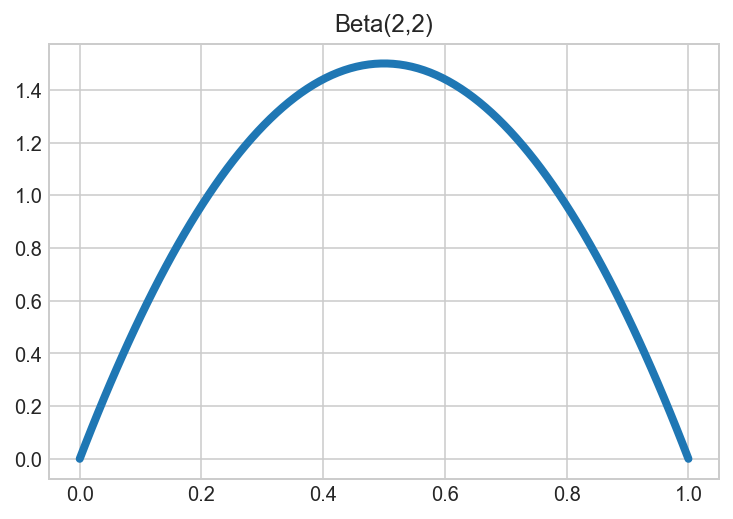

In [3]:
x = np.linspace(0,1,100)
y = stats.beta(2,2).pdf(x)
plt.plot(x,y,lw=4)
plt.title('Beta(2,2)')
plt.show()

Again, observing five consecutive rises we would have for the posterior distribution

$$
\begin{eqnarray*}
P(\theta|5) 
&=& \frac{\theta^5\cdot6\,\theta\,(1-\theta)}
{\int_0^1 d\theta\,\theta^5\cdot 6\,\theta\,(1-\theta)}\\
&=& \frac{\theta^6\,(1-\theta)}
{\int_0^1 d\theta\,\theta^6\,(1-\theta)}\\
&=&
56\,\theta^6(1-\theta)
\end{eqnarray*}
$$

Here we used that denominator becomes

$$
\begin{eqnarray*}
\int_0^1 d\theta\,\theta^6\,(1-\theta) 
&=& \int_0^1 d\theta\,(\theta^6-\theta^7)\\
&=& \int_0^1 d\theta\, \theta^6 - \int_0^1 d\theta\, \theta^7\\
&=& \left.\frac{\theta^7}{7}\right\vert_0^1-\left.\frac{\theta^8}{8}\right\vert_0^1 \\
&=& \frac{1}{7}-\frac{1}{8} \\
&=& \frac{1}{56}
\end{eqnarray*}
$$

The posterior expectation, i.e. the mean of $\theta$ calculated from the posterior distribution, is calculated as 

$$
\begin{eqnarray*}
E[\theta] &=& \int_0^1 d\theta\,\theta \, P(\theta|5)\\
&=& \int_0^1 d\theta\,\theta \, P(\theta|5)\\
&=& \int_0^1 d\theta\,\theta \, 56\,\theta^6(1-\theta)\\
&=& 56 \int_0^1 d\theta\,\theta^7(1-\theta)\\
&=& 56 \int_0^1 d\theta\,(\theta^7-\theta^8)\\
&=& 56\left(\left.\frac{\theta^8}{8}\right\vert_0^1-\left.\frac{\theta^9}{9}\right\vert_0^1 \right)\\
&=& 56 \left(\frac{1}{8}-\frac{1}{9}\right)\\
&=& \frac{7}{9}\\
&=& 0.778
\end{eqnarray*}
$$

Let's verify the integrals by using scipy's numerical integration:

In [4]:
from scipy.integrate import quad

In [5]:
# first integral (the normalization factor)
func_1 = lambda x: stats.beta(2,2).pdf(x)*x**5
int_1 = quad(func_1,0,1)
# this gives two outputs, the result of the integral and an 
# estimate of the numerical error
print(int_1)
# check that it gives the correct prefactor of 56
print(6/int_1[0])

(0.10714285714285714, 1.189524669241239e-15)
56.0


In [6]:
# second integral (mean of theta given the five consecutive rises)
func_2 = lambda x: stats.beta(2,2).pdf(x)*x**6/int_1[0]
int_2 = quad(func_2,0,1)
print(int_2)

(0.7777777777777778, 8.635067969306774e-15)


In [7]:
# determine the location of the mode of the posterior distribution
x = np.linspace(0,1,1000)
y = stats.beta(2,2).pdf(x)*x**6/int_1[0]
mode = x[np.argmax(func_2(x))]
print('mode:', mode)

mode: 0.8748748748748749


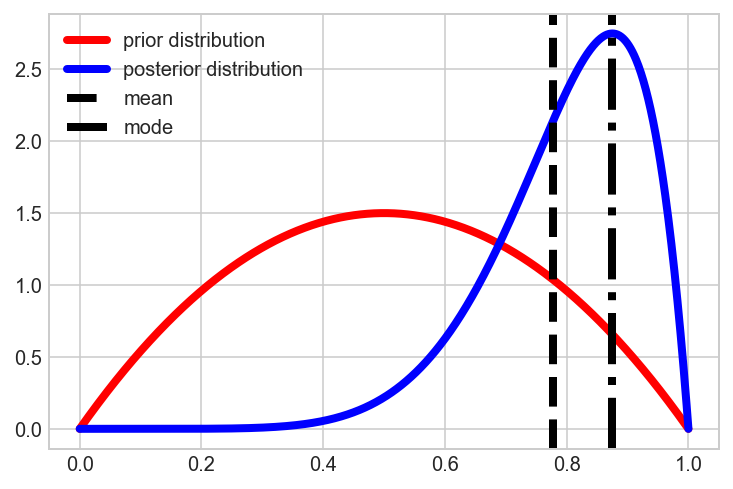

In [8]:
plt.plot(x, stats.beta(2,2).pdf(x), c='r', lw=4, label='prior distribution')
plt.plot(x, func_2(x), c='b', lw=4, label='posterior distribution')
plt.axvline(int_2[0], c='k', ls='--', lw=4, label='mean')
plt.axvline(x[np.argmax(func_2(x))], color='k', ls='-.', lw=4,
            label='mode')
plt.legend()
plt.show()

### Write a function which returns the posterior mean for arbitrary number of consecutive rises and different types of Beta function priors with parameters alpha and beta.